In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data EDA

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Observation 
* bmi column having a null values

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Checking the distribution of bmi column with the help of graph

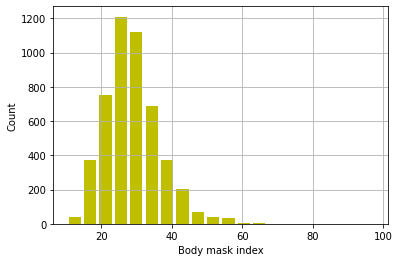

In [16]:
plt.hist(data.bmi,bins=20,rwidth=0.8,color = 'y')
plt.xlabel('Body mask index')
plt.ylabel('Count')
plt.grid()
plt.show()

observation : bmi column is gaussian distribution, so we can fill the
              null value with the help of mean.

In [17]:
data['bmi'].mean()

28.893236911794673

In [18]:
data['bmi'].std()

7.854066729680158


# Filling the Missing values in bmi column

In [21]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [22]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Not having a null values in this dataset

# Droping 'id' column

In [23]:
data.drop(['id'],axis = 1, inplace = True)

In [24]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# EDA With Grahps

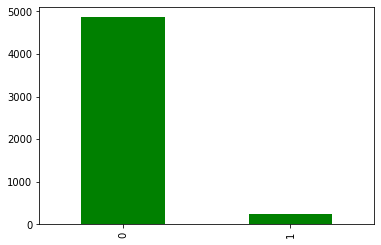

In [69]:
data['stroke'].value_counts().plot(kind = 'bar', color = 'g')
plt.show()

# Checking Outliers in categorical columns

In [35]:
num = data.select_dtypes(exclude = 'object')

In [36]:
num

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


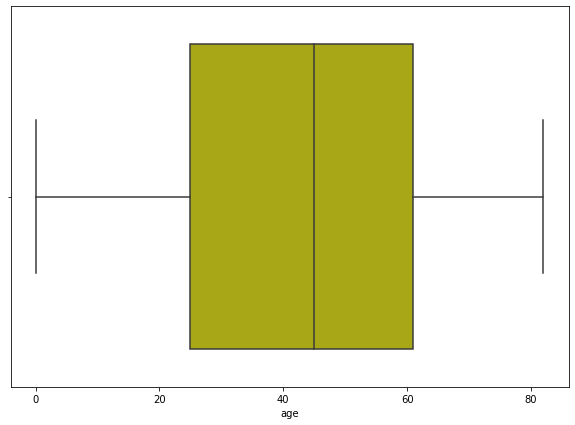

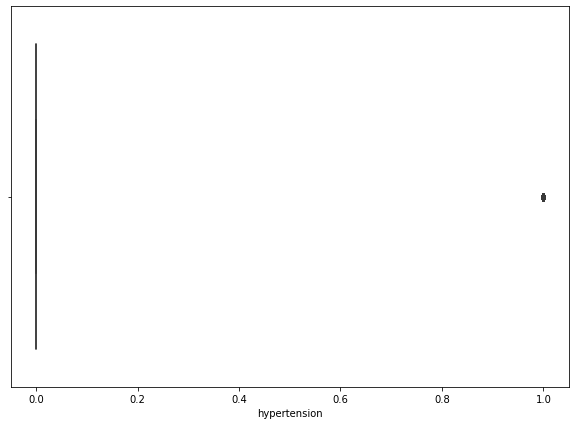

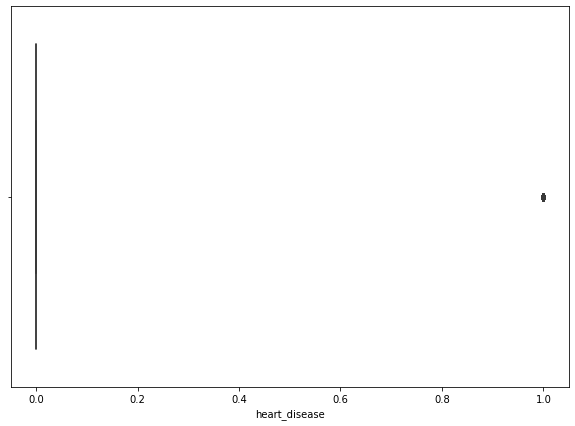

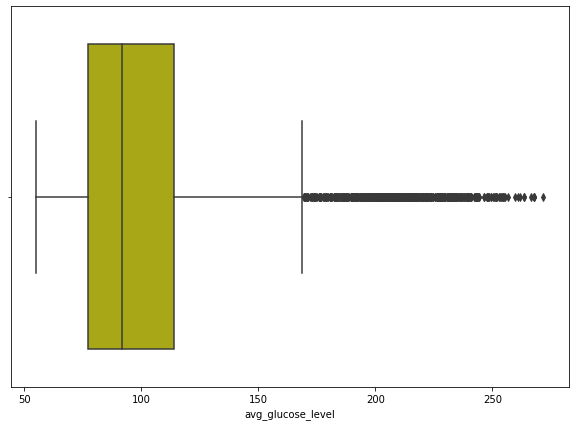

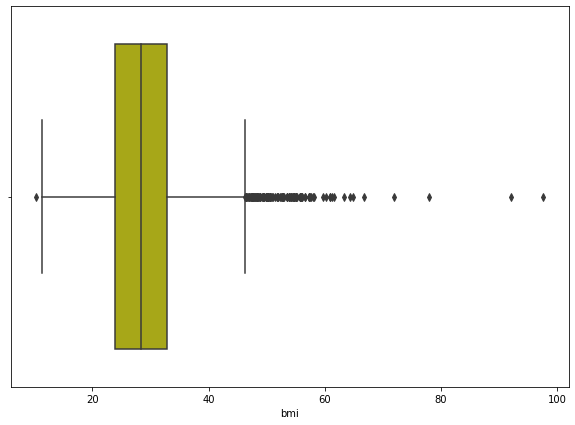

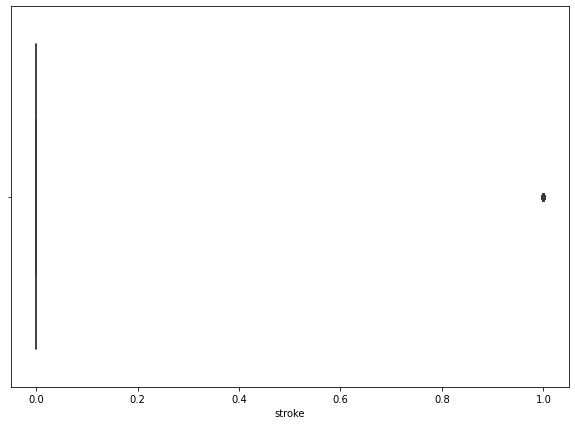

In [38]:
for i in num.columns:
    plt.figure(figsize=(10,7))
    sns.boxplot(data=num,x=i,color = 'y')
    plt.show()

# Gender column with chart

In [39]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

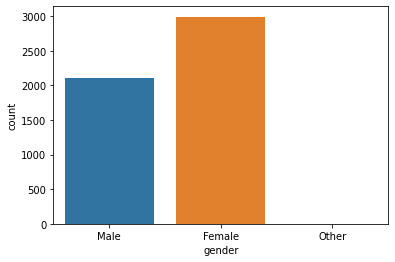

In [42]:
sns.countplot(data = data, x = 'gender')
plt.show()

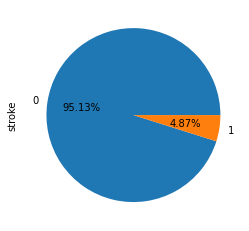

In [50]:
data['stroke'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

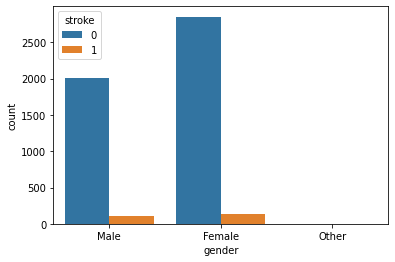

In [44]:
sns.countplot(data=data,x='gender',hue='stroke')
plt.show()

# Age column with groupby()

In [48]:
data.groupby('gender').mean()[['age', 'stroke']]

,age,stroke
gender,,
Female,43.757395,0.047094
Male,42.483385,0.051064
Other,26.000000,0.000000


# Ever Married column with graph

In [51]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

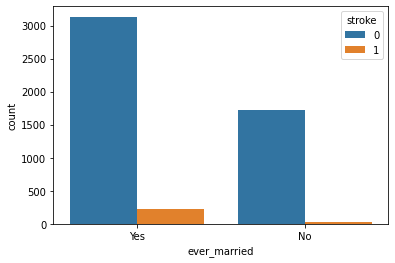

In [52]:
sns.countplot(data = data, x = 'ever_married', hue = 'stroke')
plt.show()

# Work type with Graphs

In [56]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [57]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

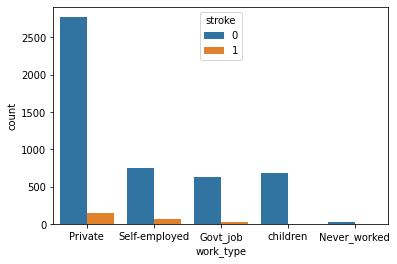

In [58]:
sns.countplot(data=data,x='work_type',hue='stroke')
plt.show()

# Residence Type with graph

In [59]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [60]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

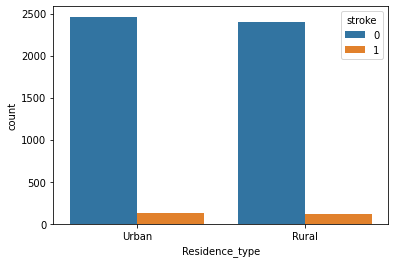

In [61]:
sns.countplot(data=data,x='Residence_type',hue='stroke')
plt.show()

# Smoking Features with graph

In [62]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

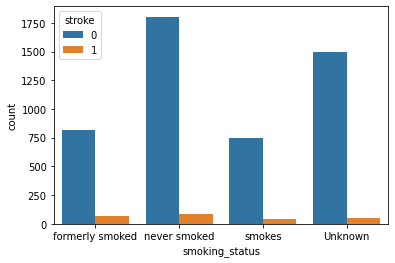

In [63]:
sns.countplot(data=data,x='smoking_status',hue='stroke')
plt.show()

# Heatmap

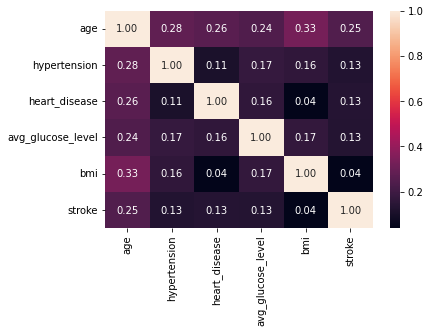

In [65]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

# Encoding the categorical variables

In [66]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [68]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [73]:
data['gender'] = lr.fit_transform(data['gender'])
data['ever_married'] = lr.fit_transform(data['ever_married'])
data['work_type'] = lr.fit_transform(data['work_type'])
data['Residence_type'] = lr.fit_transform(data['Residence_type'])
data['smoking_status'] = lr.fit_transform(data['smoking_status'])

# Splitting data into Independent & Dependent variables

In [74]:
x=data.drop('stroke',axis=1).values

In [75]:
x

array([[ 1.        , 67.        ,  0.        , ..., 36.6       ,
         1.        ,  1.        ],
       [ 0.        , 61.        ,  0.        , ..., 28.89323691,
         2.        ,  0.        ],
       [ 1.        , 80.        ,  0.        , ..., 32.5       ,
         2.        ,  1.        ],
       ...,
       [ 0.        , 35.        ,  0.        , ..., 30.6       ,
         2.        ,  0.        ],
       [ 1.        , 51.        ,  0.        , ..., 25.6       ,
         1.        ,  1.        ],
       [ 0.        , 44.        ,  0.        , ..., 26.2       ,
         0.        ,  0.        ]])

In [76]:
y=data['stroke'].values

In [77]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Splitting data for train test

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
classifier = LogisticRegression()

In [84]:
classifier.fit(x_train, y_train)

LogisticRegression()

In [85]:
predict = classifier.predict(x_test)

In [86]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)